### DATASET:
```
./kaggle/input/dpl-fall2023/
├── devset_images
│   ├── devset_images (SET OF IMAGE FOR TRAINING PROCESS)
│   └── ._devset_images
│
├── devset_images_features 
│   └── devset_images_features
│
├── testset_images
│   └── testset_images (SET OF IMAGE WHICH WE HAVE TO PREDICT == RESULT)
│
├── devset_images_gt.csv (STORE LABEL OF TRAINING DATASET)
│
├── devset_images_metadata.json
│
└── test.csv (MORE INFORMATION OF TESTSET_IMAGE)
 
```
Link data: https://www.kaggle.com/datasets/nguyenhoangthaik17hl/dpl-fall2023/

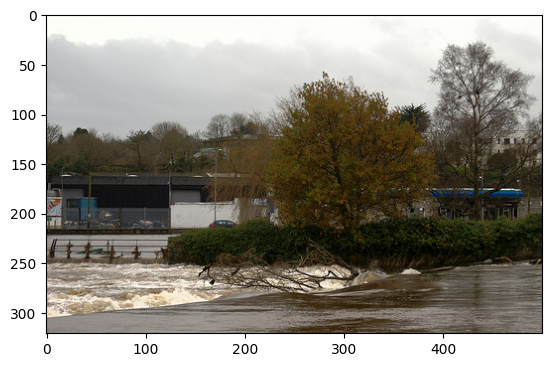

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
test_img = plt.imread('/kaggle/input/dpl-fall2023/testset_images/testset_images/4124534151.jpg')
plt.imshow(test_img)

In [2]:
!rm -r /kaggle/working/*

rm: cannot remove '/kaggle/working/*': No such file or directory


In [3]:
# pip install tensorflow==2.9.1

In [4]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.12.0


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [6]:
TRAIN_FOLDER_PATH = '/kaggle/input/dpl-fall2023/devset_images/devset_images/'
TEST_FOLDER_PATH = '/kaggle/input/dpl-fall2023/testset_images/testset_images/'
TRAIN_LABEL_PATH = '/kaggle/input/dpl-fall2023/devset_images_gt.csv'
TEST_MORE_INFO_PATH = '/kaggle/input/dpl-fall2023/test.csv'

# train_images = glob.glob('/kaggle/input/dpl-fall2023/devset_images/devset_images/*')
# test_images = glob.glob('/kaggle/input/dpl-fall2023/testset_images/testset_images/*')
# print(train_images)

In [7]:
# Assuming you've already loaded your CSV into train_dict
train_list = list() 
train_csv = pd.read_csv(TRAIN_LABEL_PATH)

# Iterate over rows using iloc
for index in range(len(train_csv)):
    row = train_csv.iloc[index]
    train_list.append([TRAIN_FOLDER_PATH + str(row['id']), row['label']])

In [8]:
test_images = glob.glob('/kaggle/input/dpl-fall2023/testset_images/testset_images/*')

In [9]:
len(test_images)

1320

## DATA PREPARATION

#### Train dataset

In [10]:
# dimension = set()
# for path in train_images:
#     img = plt.imread(train_images[0])
# #     plt.imshow(img)
#     dimension.add(img.shape)
# #     break
# dimension

**Greatly! All of the train images have the same size (374,500,3)**

In [11]:
# dimension = set()
# for path in test_images:
#     img = plt.imread(test_images[0])
# #     plt.imshow(img)
#     dimension.add(img.shape)
# #     break
# dimension

**Greatly! All of the train images have the same size (335,500,3)**

In [12]:
print('Number of train_image:',len(train_list))
print('Number of test_image:',len(test_images))

Number of train_image: 5280
Number of test_image: 1320


## DATA PREPARATION 


#### Train Images

In [13]:
train_list[0]

['/kaggle/input/dpl-fall2023/devset_images/devset_images/3519864665', 0]

#### x_train

In [14]:
normalize_x = 224
normalize_y = 224

In [15]:
x_train = []
train_label = []
for image_label in train_list:
    filename = next((f'{image_label[0]}.{tail}' for tail in ['jpg', 'png', 'gif'] \
                 if os.path.isfile(f'{image_label[0]}.{tail}')), None)
    image = Image.open(filename)

    image = image.resize((normalize_x, normalize_y))
    #image = np.resize(image, (150, 150, 3))

    arr = np.array(image).reshape(normalize_x, normalize_y, 3)
    
    arr = arr.astype('float32') / 255.0
    mean = np.mean(arr) 
    arr -= mean
    x_train.append(arr)
    train_label.append(image_label[1])
x_train = np.array(x_train)
# _, width, height, channel = x_train.shape
# np.save(f'x_train_{width}x{height}x{channel}.npy', x_train)

In [16]:
x_train.shape

(5280, 224, 224, 3)

In [17]:
train_label= np.array(train_label)
# train_label

In [18]:
y = np.array(train_label)

y = y.reshape(-1, 1)
y.shape

(5280, 1)

In [19]:
test_list = os.listdir('/kaggle/input/dpl-fall2023/testset_images/testset_images')

In [20]:
test_list[0]

'4945787026.jpg'

In [21]:
test_list[0][:-4]

'4945787026'

#### x_test

In [22]:
x_test = []
test_id = []
for img_id in test_list:
    if img_id[:2] != '._':
        filename = f'/kaggle/input/dpl-fall2023/testset_images/testset_images/{img_id}'

        image = Image.open(filename)

        image = image.resize((normalize_x, normalize_y))
        #image = np.resize(image, (150, 150, 3))

        arr = np.array(image).reshape(normalize_x, normalize_y, 3)
        
        arr = arr.astype('float32') / 255.0
        mean = np.mean(arr) 
        arr -= mean
        
        x_test.append(arr)
        test_id.append(img_id[:-4])
x_test = np.array(x_test)
# _, wid, hei, chan = x_test.shape
# np.save(f'x_test_{wid}x{hei}x{chan}.npy', x_test)

In [23]:
x_test.shape

(1320, 224, 224, 3)

In [24]:
len(test_id)

1320

In [25]:
# test_id

#### Train Text

In [26]:
# import json
# import pandas as pd
# with open('/kaggle/input/dpl-fall2023/devset_images_metadata.json') as f:
#     data = json.load(f)
# df = pd.DataFrame(data['images'])
# df

In [27]:
# df.shape

Train_information

In [28]:
# import numpy as np
# def check_character(word, target):
#     try:
#         if word in (''.join(target)).lower(): return 1
#         else: return 0
#     except:
#         return 0
    
# flood_presence_train = []
# for i in range(df.shape[0]):
#     cate = []
#     if check_character('flood', df['title'][i]) or \
#         check_character('flood', df['description'][i]) or\
#         check_character('flood', df['user_tags'][i]):
#         cate.append(1)
#     else: cate.append(0)
#     flood_presence_train.append(cate)
# binary_train = np.array(flood_presence_train)
# binary_train.shape

In [29]:
# binary_train

In [30]:
# binary_train.shape

Test_information

In [31]:
# df2 = pd.read_csv('/kaggle/input/dpl-fall2023/test.csv')
# df2 = pd.DataFrame(df2)
# df2

In [32]:
# x_test_remainder = []
# test_id_1 = []
# test_id_unknown = []

In [33]:
# x_test[2].shape

In [34]:
# import numpy as np
# def check_character(word, target):
#     try:
#         if word in (''.join(target)).lower(): return 1
#         else: return 0
#     except:
#         return 0
    
# flood_presence_train = []
# for i in range(df2.shape[0]):
#     cate = []
#     if check_character('flood', df2['title'][i]) or \
#         check_character('flood', df2['description'][i]) or\
#         check_character('flood', df2['user_tags'][i]):
#         cate.append(1)
# #         test_id_1.append(df2['image_id'][i])
#     else: 
#         cate.append(0)
# #         test_id_unknown.append(df2['image_id'][i])
# #         x_test_remainder.append(x_test[i])

#     flood_presence_train.append(cate)
# test_bin = np.array(flood_presence_train)
# test_bin

In [35]:
# print(test_bin.shape)
# print(x_test.shape) # array 
# print(len(test_id_1))
# print(len(x_test_remainder))

In [36]:
# label_1 = [1] * len(test_id_1)
# len(label_1)

In [37]:
# x_test_remainder = np.array(x_test_remainder)
# x_test_remainder.shape

In [38]:
# print(len(test_id_1))
# print(len(test_id_unknown))

Link data_matrix: https://www.kaggle.com/datasets/phmnhnguyt/handwriting-model